# Image Analysis

In [7]:
# basic imports and notebook configurations
# standard Python modules
import logging
import os
import sys

# additional Python modules
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

# own python modules
from methods import *

# %aimport analyis
#importlib.reload(influx_db)
#importlib.reload(plot_tools)
plt.style.use('classic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## logging configuration

In [8]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
log = logging.getLogger(os.path.splitext(os.path.basename(sys.argv[0]))[0])
log.setLevel(logging.INFO)

### Development setup

2023-05-08 10:57:15,521 - INFO - methods.py - get_image_files - Found 294 images for case 0,5mmspacer0.1ml2
2023-05-08 10:57:15,606 - INFO - methods.py - process_image - -----------------------------
2023-05-08 10:57:15,607 - INFO - methods.py - process_image - processing image 00000018_00000000427B12A1
2023-05-08 10:57:15,607 - INFO - methods.py - process_image - -----------------------------
2023-05-08 10:57:15,683 - INFO - methods.py - make_histo - Already created histogramm for image 00000018_00000000427B12A1 in folder png_cases
2023-05-08 10:57:16,274 - INFO - methods.py - segment_camera - Cam seed value: 12
2023-05-08 10:57:16,298 - INFO - methods.py - segment_camera - Insta seed value: 13
2023-05-08 10:57:21,328 - INFO - methods.py - segment_camera - Limit: 43 delta = 1.0122024706236818
2023-05-08 10:57:23,048 - INFO - methods.py - segment_instability - Insta seed value: 87
2023-05-08 10:57:25,549 - INFO - methods.py - refine_instability - Contours_n: 1
2023-05-08 10:57:25,889 -

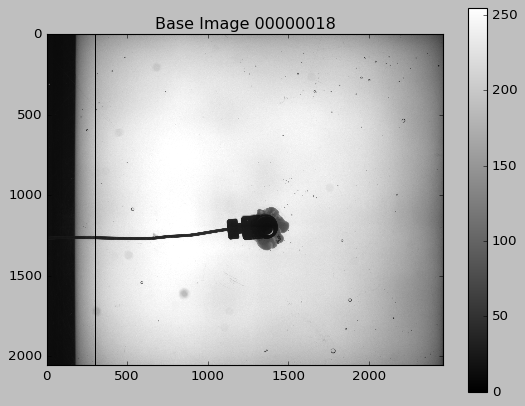

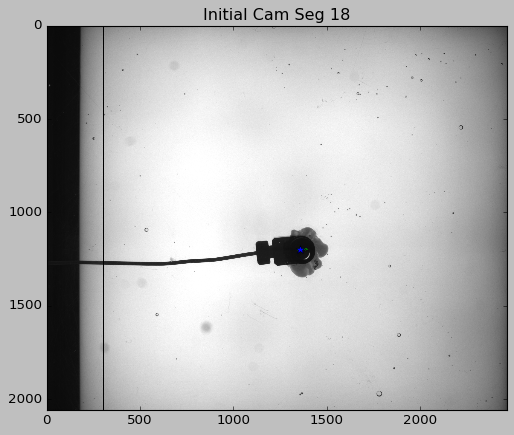

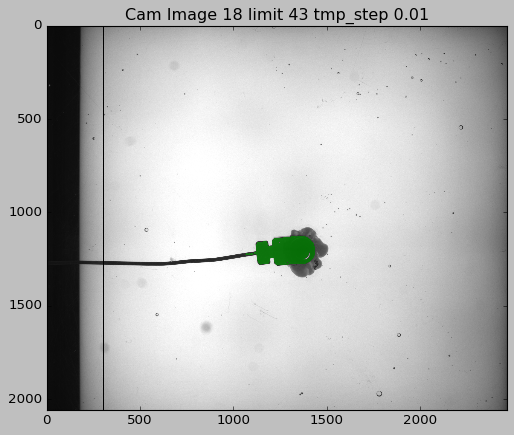

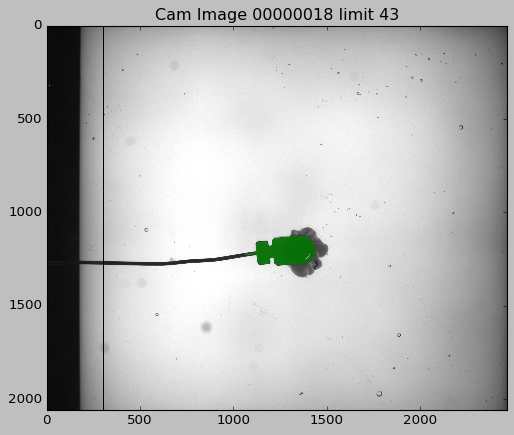

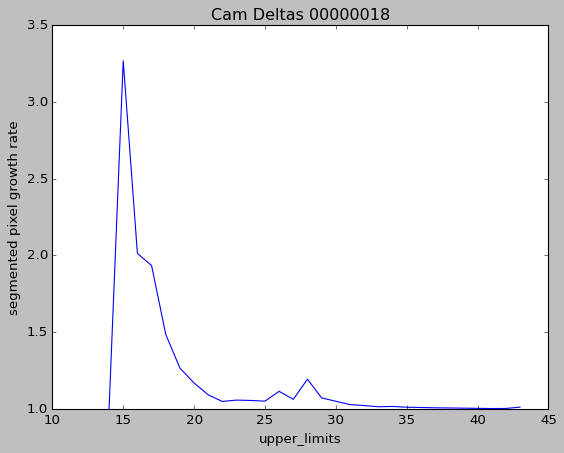

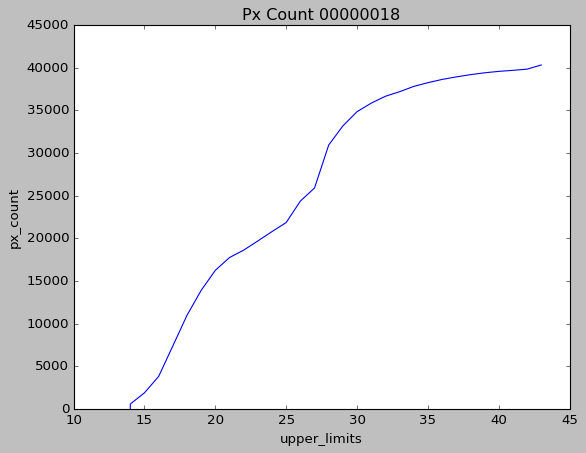

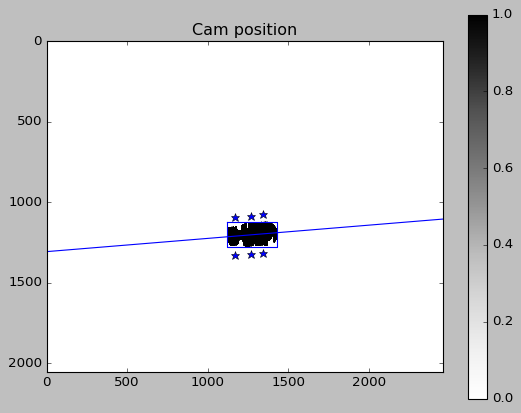

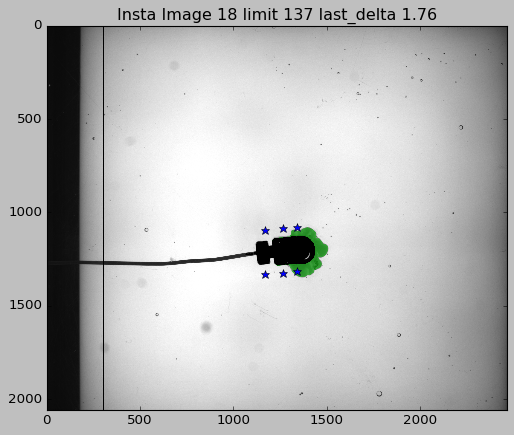

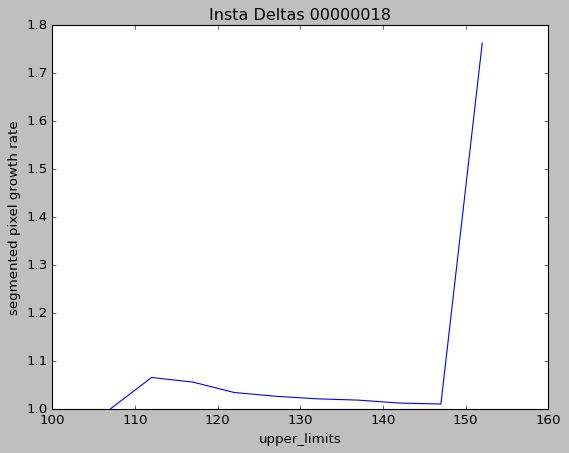

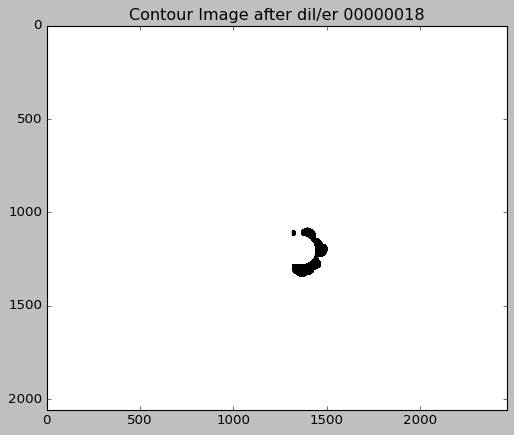

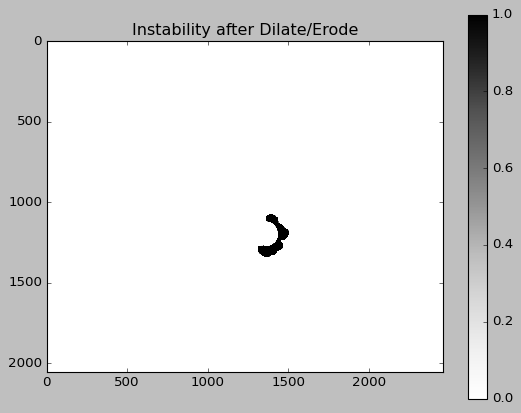

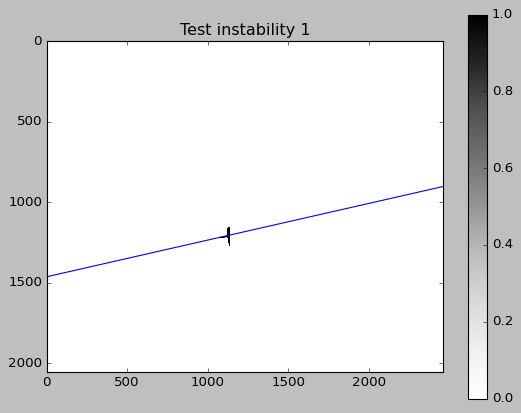

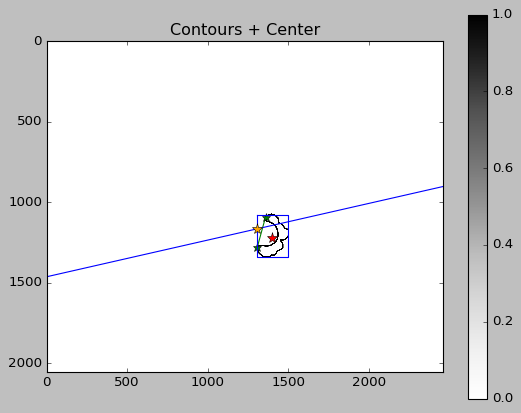

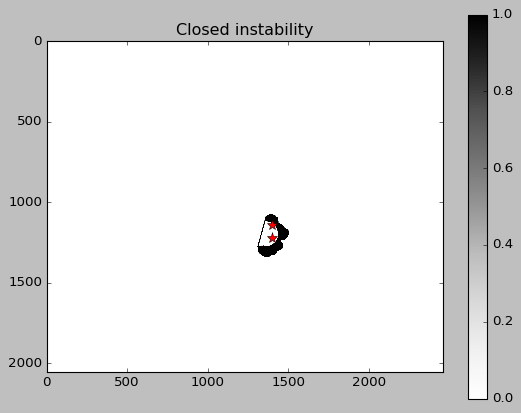

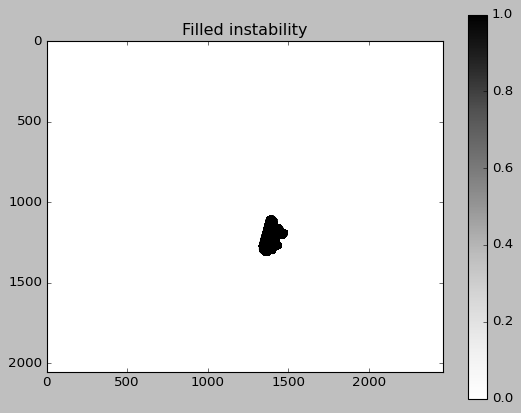

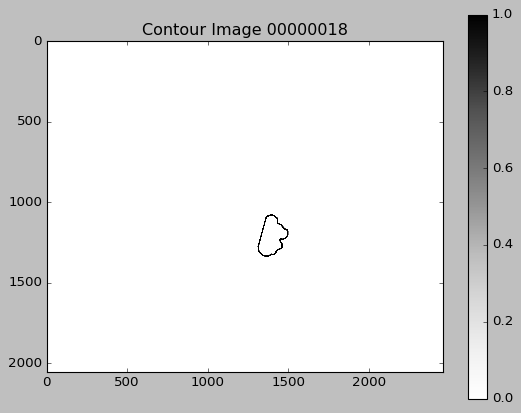

In [9]:
# read config
config = get_config()
# get dev case
cases = config["cases"]
# get image name
for cas in cases:
    images = get_image_files(config, cas, "png_cases")
    for img in images:
        process_image(img, config, cas)